# Imports

In [1]:
from scipy.stats import norm
import matplotlib.mlab as mlab
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import uproot
import pickle
import pandas as pd
import numpy as np
%matplotlib inline

# Load Data:

In [2]:
eventsWithReg_EB = pd.read_pickle("eventsWithReg_EB.pkl")
xtest = pd.read_pickle("xtest.pkl")
ytest = pd.read_pickle("ytest.pkl")

# Definitions:

In [3]:
Ptrange_0_1_2_3_4_5_10_50_100_1000_10000_int = [0,1,2,3,4,5,10,50,100,200,1000]
def Ptrange_0_1_2_3_4_5_10_50_100_1000_10000(n):
    if n == 0:
        lowPt = 0
        highPt = 1
    if n == 1:
        lowPt = 1
        highPt = 2
    if n == 2:
        lowPt = 2
        highPt = 3
    if n == 3:
        lowPt = 3
        highPt = 4
    if n == 4:
        lowPt = 4
        highPt = 5
    if n == 5:
        lowPt = 5
        highPt = 10
    if n == 6:
        lowPt = 10
        highPt = 50
    if n == 7:
        lowPt = 50
        highPt = 100
    if n == 8:
        lowPt = 100
        highPt = 1000
    if n == 9:
        lowPt = 1000
        highPt = 10000
    
    return lowPt, highPt    

In [4]:
Ptrange_0_1_10_100_1000_int = [0,1,10,100,1000]
def Ptrange_0_1_10_100_1000(n):
    if n == 0:
        lowPt = 0
        highPt = 1
    if n == 1:
        lowPt = 1
        highPt = 10
    if n == 2:
        lowPt = 10
        highPt = 100
    if n == 3:
        lowPt = 100
        highPt = 1000
    
    return lowPt, highPt   

In [124]:
Ptrange_0_10_1000_int = [0,10,1000]
def Ptrange_0_10_1000(n):
    if n == 0:
        lowPt = 0
        highPt = 10
    if n == 1:
        lowPt = 10
        highPt = 1000
    
    return lowPt, highPt   

# Variables:

In [71]:
'''regVarsEB = eventsWithReg_EB[["clusrawE", "clusIetaIx", "clusIphiIy", "ietamod20", "iphimod20", "nhits_mod"]]
tgtvar = eventsWithReg_EB[["genEnergy"]]

regVarsEB = regVarsEB[:10000]
tgtvar = tgtvar[:10000]'''

regVarsEB = xtest
tgtvar = ytest
ytest = np.array(ytest)[:10000]
regVarsEB = regVarsEB[:10000]
tgtvar = tgtvar[:10000]
clusrawE = np.array(eventsWithReg_EB["clusrawE"])[:10000]

tgtvar = []
for i in range(len(ytest)):
    tgtvar.extend(ytest[i])

# Loading models and making predicitons:

In [ ]:
NSVR = pickle.load(open('NSVR_model.sav', 'rb'))
SVR = pickle.load(open('SVR_model.sav', 'rb'))
XGBR = pickle.load(open('XGBR_model.sav', 'rb'))
HGBR = pickle.load(open('HGBR_model.sav', 'rb'))
ADA = pickle.load(open('ADA_model.sav', 'rb'))
KNR = pickle.load(open('KNR_model.sav', 'rb'))
RFR = pickle.load(open('RFR_model.sav', 'rb'))
ETR = pickle.load(open('ETR_model.sav', 'rb'))

In [56]:
ypred_NSVR = NSVR.predict(regVarsEB)
ypred_SVR = SVR.predict(regVarsEB)
ypred_XGBR = np.array(XGBR.predict(regVarsEB, ntree_limit=XGBR.best_ntree_limit))
ypred_HGBR = HGBR.predict(regVarsEB)
ypred_ADA = ADA.predict(regVarsEB)
ypred_KNR = KNR.predict(regVarsEB)
ypred_RFR = RFR.predict(regVarsEB)
ypred_ETR = ETR.predict(regVarsEB)

C:\Users\jonla\anaconda4\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


# Creating Dataframe:

In [90]:
genPt = np.array(eventsWithReg_EB["genPt"])[:10000]
genEta = np.array(eventsWithReg_EB["genEta"])[:10000]
response = np.array(eventsWithReg_EB["response"])[:10000]
tgtvar_og = np.array(eventsWithReg_EB["tgtvar"])[:10000]
clusrawE = np.array(eventsWithReg_EB["clusrawE"])[:10000]
cluscorrE = np.array(eventsWithReg_EB["cluscorrE"])[:10000]
clusPt = np.array(eventsWithReg_EB["clusPt"])[:10000]
genEnergy = np.array(eventsWithReg_EB["genEnergy"])[:10000]
e91X = np.array(eventsWithReg_EB["e91X"])[:10000]
events = np.arange(0,10000,1)


rawDivGen = np.divide(clusrawE, genEnergy)[:10000]
e91XDivGen = np.divide(e91X,  genEnergy)[:10000]
xgbrDivGen = np.divide(ypred_XGBR,  tgtvar)[:10000]
nsvrDivGen = np.divide(ypred_NSVR,  tgtvar)[:10000]
corrDivGen = np.divide(cluscorrE,  genEnergy)[:10000]
svrDivGen = np.divide(ypred_SVR,  tgtvar)[:10000]
hgbrDivGen = np.divide(ypred_HGBR,  tgtvar)[:10000]
adaDivGen = np.divide(ypred_ADA,  tgtvar)[:10000]
knrDivGen = np.divide(ypred_KNR,  tgtvar)[:10000]
rfrDivGen = np.divide(ypred_RFR,  tgtvar)[:10000]
etrDivGen = np.divide(ypred_ETR,  tgtvar)[:10000]


In [91]:
df = pd.DataFrame({
    'events':events,
    'genPt':genPt,
    'genEta':genEta,
    'clusPt':clusPt,
    'clusrawE':clusrawE,
    'cluscorrE':cluscorrE,
    #'xgbr_Energy':ypred_xgbr,
    'e91X' :e91X,
    'genEnergy':genEnergy,
    'rawDivGen':rawDivGen,
    'e91XDivGen':e91XDivGen,
    'xgbrDivGen':xgbrDivGen,
    'nsvrDivGen':nsvrDivGen,
    'svrDivGen':svrDivGen,
    'hgbrDivGen':hgbrDivGen,
    'adaDivGen':adaDivGen,
    'knrDivGen':knrDivGen,
    'rfrDivGen':rfrDivGen,
    'etrDivGen':etrDivGen,
    'corrDivGen':corrDivGen
})
#df[['rawDivGen','e91XDivGen','xgbrDivGen','nsvrDivGen','svrDivGen','hgbrDivGen','adaDivGen','knrDivGen','rfrDivGen','etrDivGen','corrDivGen',]]


# create columns which bins corrE/genE for each regression

In [92]:
df['binned_corrDivGen'] = pd.cut(df['corrDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_e91XDivGen'] = pd.cut(df['e91XDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_nsvrDivGen'] = pd.cut(df['nsvrDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_xgbrDivGen'] = pd.cut(df['xgbrDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_svrDivGen'] = pd.cut(df['svrDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_hgbrDivGen'] = pd.cut(df['hgbrDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_adaDivGen'] = pd.cut(df['adaDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_knrDivGen'] = pd.cut(df['knrDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_rfrDivGen'] = pd.cut(df['rfrDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_etrDivGen'] = pd.cut(df['etrDivGen'], bins = np.arange(.6,1.8,.01))

# create columns which bin genPt

In [112]:
div_bins_0_1_2_3_4_5_10_50_100_1000_10000_int = Ptrange_0_1_2_3_4_5_10_50_100_1000_10000_int
div_bins_0_1_2_3_4_5_10_50_100_1000_10000_int = np.array(div_bins_0_1_2_3_4_5_10_50_100_1000_10000_int)
df['binned_genPt_0_1_2_3_4_5_10_50_100_1000_10000_int'] = pd.cut(df['genPt'], bins = div_bins_0_1_2_3_4_5_10_50_100_1000_10000_int, labels = ['0','1','2','3','4','5','6','7','8','9'])

div_bins_0_1_10_100_1000_int = Ptrange_0_1_10_100_1000_int
div_bins_0_1_10_100_1000_int = np.array(div_bins_0_1_10_100_1000_int)
df['binned_genPt_0_1_10_100_1000_int'] = pd.cut(df['genPt'], bins = div_bins_0_1_10_100_1000_int, labels = ['0','1','2','3'])

div_bins_0_10_1000_int = Ptrange_0_10_1000_int
div_bins_0_10_1000_int = np.array(div_bins_0_10_1000_int)
df['binned_genPt_0_10_1000_int'] = pd.cut(df['genPt'], bins = div_bins_0_10_1000_int, labels = ['0','1'])

# separate genPt bins into separate lists and concatenate those lists into a dictionary "dict_of_genPt_lists":

In [113]:
dict_of_genPt_lists_1 = []
for i in range(0,10):
    dict_of_genPt_lists_1.append(df[df['binned_genPt_0_1_2_3_4_5_10_50_100_1000_10000_int'] == str(i)])
    
dict_of_genPt_lists_2 = []
for i in range(0,10):
    dict_of_genPt_lists_2.append(df[df['binned_genPt_0_1_10_100_1000_int'] == str(i)])
    
dict_of_genPt_lists_3 = []
for i in range(0,10):
    dict_of_genPt_lists_3.append(df[df['binned_genPt_0_10_1000_int'] == str(i)])

# Histograms:

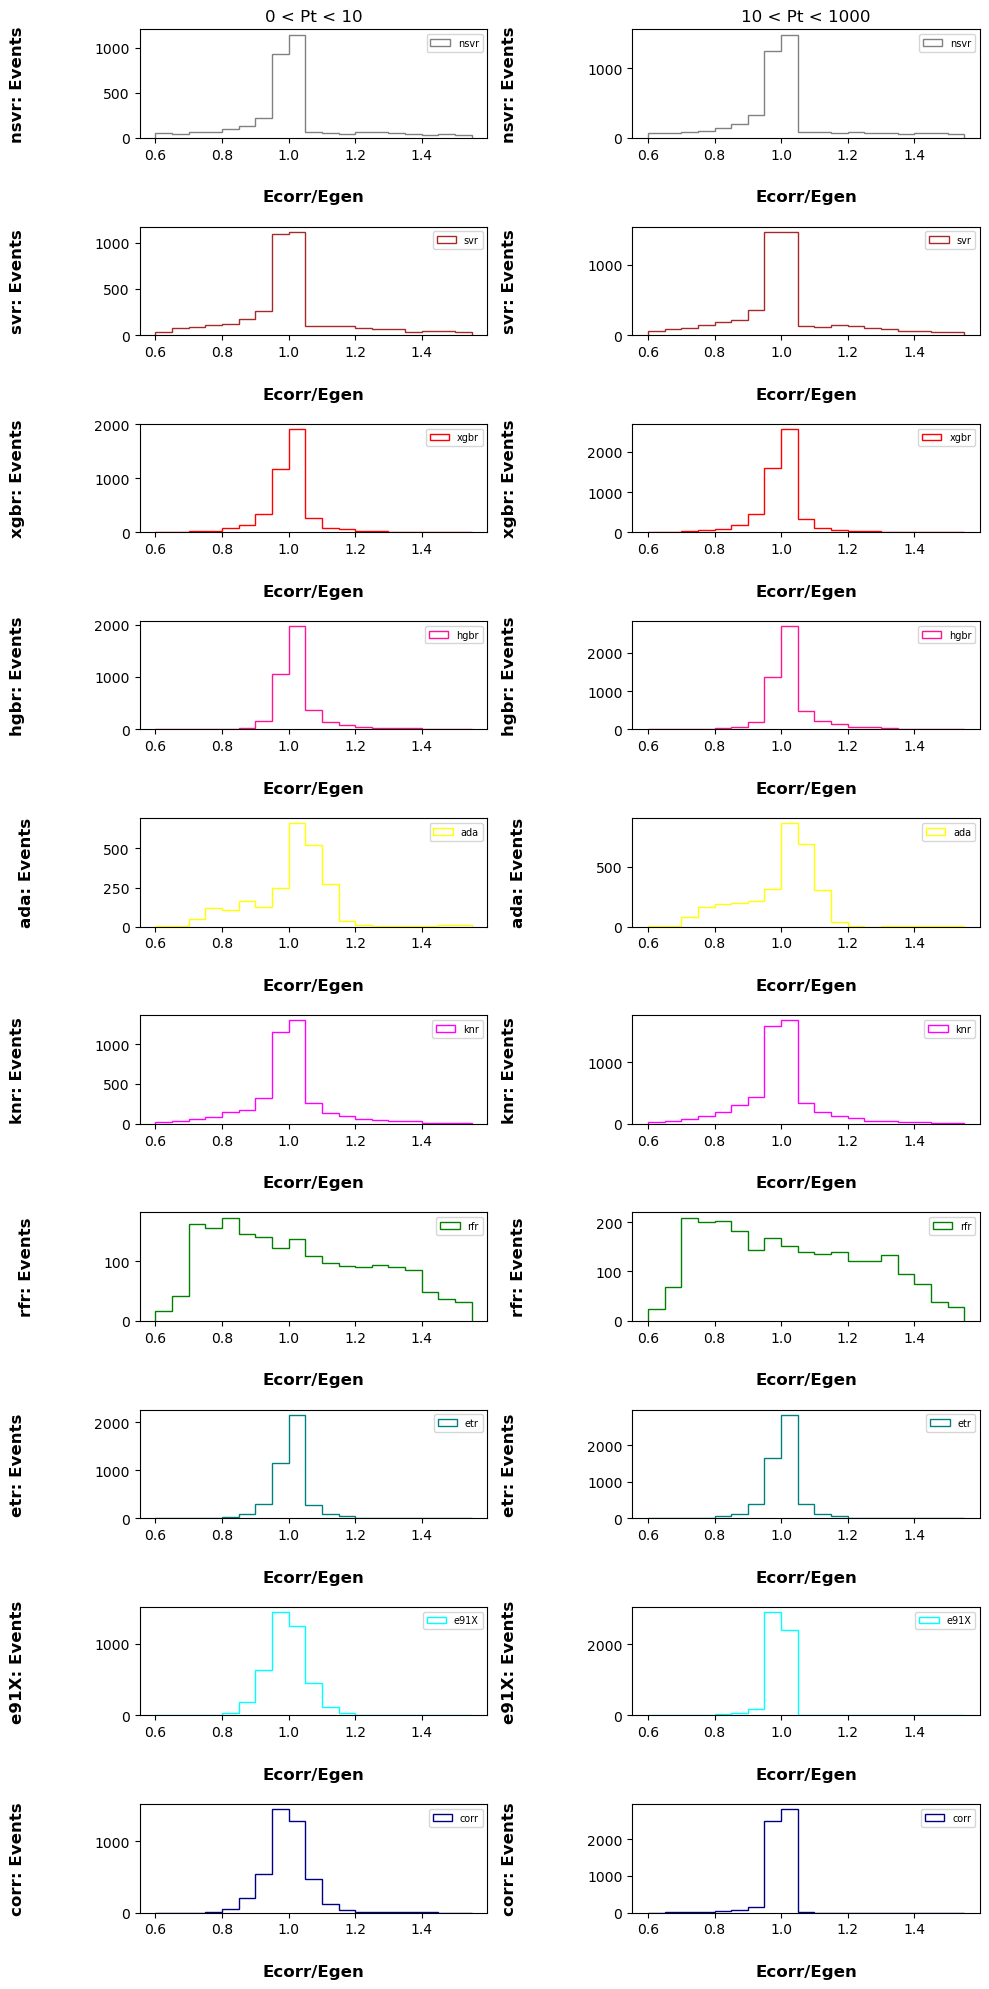

In [146]:
list_of_lists = []

fig, ax4 = plt.subplots(10,2, figsize =(10, 20),sharey=False,tight_layout=True )

for i in range(20):    
    a = i%2
    b = (i - (i%2))/2 
    a = int(a)
    b = int(b)
    
    

    #print(b, " , ", a)
    
    
    
    list_of_lists.append(
        [dict_of_genPt_lists_3[a]['nsvrDivGen'],
        dict_of_genPt_lists_3[a]['svrDivGen'], 
        dict_of_genPt_lists_3[a]['xgbrDivGen'],
        dict_of_genPt_lists_3[a]['hgbrDivGen'],
        dict_of_genPt_lists_3[a]['adaDivGen'],
        dict_of_genPt_lists_3[a]['knrDivGen'],
        dict_of_genPt_lists_3[a]['rfrDivGen'],
        dict_of_genPt_lists_3[a]['etrDivGen'],
        dict_of_genPt_lists_3[a]['e91XDivGen'],
        dict_of_genPt_lists_3[a]['corrDivGen']
        ])
    
    #print(list_of_lists[i][b])
    
    
    colors = ['gray', 'brown', 'red', 'deeppink', 'yellow', 'magenta', 'green', 'teal', 'aqua', 'navy']
    labels = ["nsvr","svr", "xgbr","hgbr", "ada", "knr", "rfr", "etr", "e91X", "corr"]
    count, bins, ignored = ax4[b,a].hist(list_of_lists[i][b], label = labels[b],color = colors[b], histtype='step', bins = np.arange(.6,1.6,0.05))
    
    ax4[b,a].legend(prop={'size':7})
    
    
    ax4[b,a].set_xlabel("Ecorr/Egen", labelpad=20, weight='bold', size=12)
    ax4[b,a].set_ylabel(labels[b] + ": Events", labelpad=50, weight='bold', size=12)
    if i < 2: ax4[b,a].set_title((str(Ptrange_0_10_1000(i)[0]) + " < Pt < " + str(Ptrange_0_10_1000(i)[1])))
    
    
    
plt.savefig("reg_comp_hist.pdf")

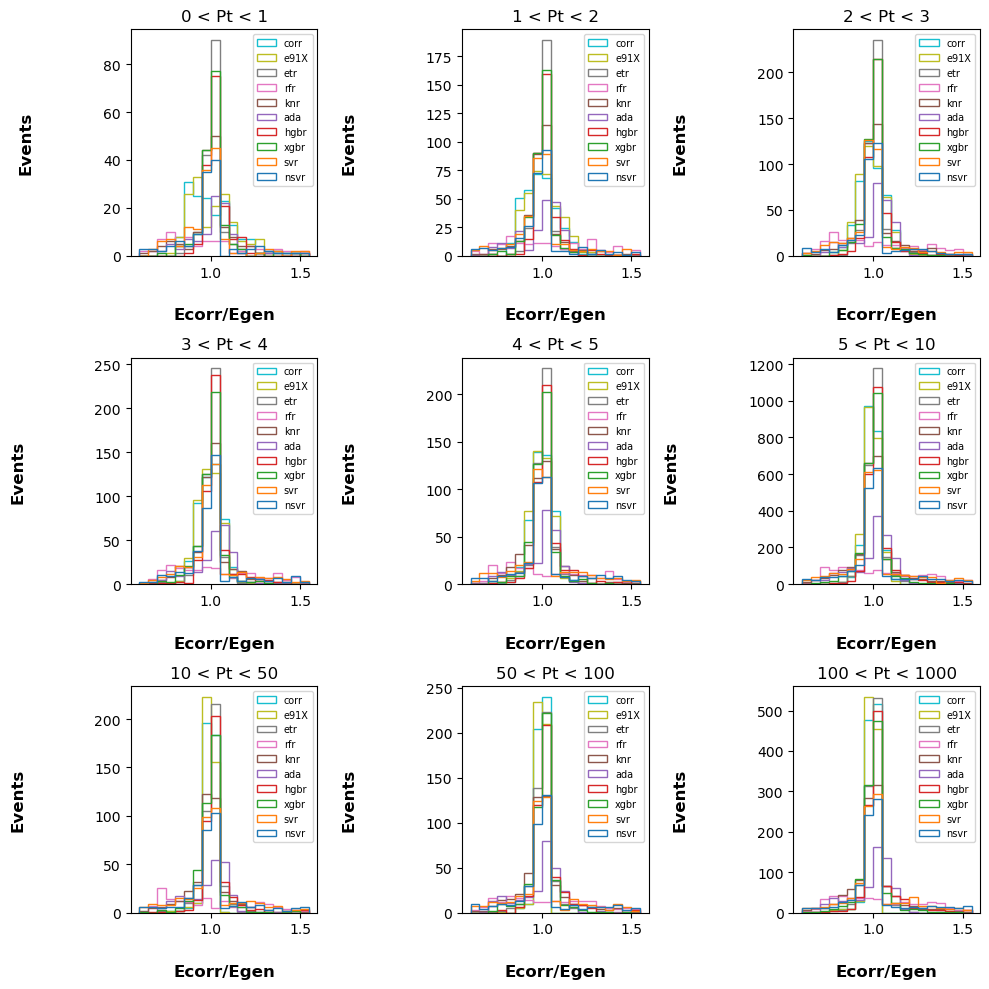

In [114]:

list_of_lists = []

fig, ax = plt.subplots(3,3, figsize =(10, 10),sharey=False,tight_layout=True )

for i in range(9):    
    a = i%3
    b = (i - (i%3))/3 
    a = int(a)
    b = int(b)
    
    
    
    list_of_lists.append(
        [dict_of_genPt_lists_1[i]['nsvrDivGen'],
        dict_of_genPt_lists_1[i]['svrDivGen'], 
        dict_of_genPt_lists_1[i]['xgbrDivGen'],
        dict_of_genPt_lists_1[i]['hgbrDivGen'],
        dict_of_genPt_lists_1[i]['adaDivGen'],
        dict_of_genPt_lists_1[i]['knrDivGen'],
        dict_of_genPt_lists_1[i]['rfrDivGen'],
        dict_of_genPt_lists_1[i]['etrDivGen'],
        dict_of_genPt_lists_1[i]['e91XDivGen'],
        dict_of_genPt_lists_1[i]['corrDivGen']
        ])
    
    
   
    labels = ["nsvr","svr", "xgbr","hgbr", "ada", "knr", "rfr", "etr", "e91X", "corr"]
    count, bins, ignored = ax[b,a].hist(list_of_lists[i], label = labels, histtype='step', bins = np.arange(.6,1.6,0.05))
    
    ax[b,a].legend(prop={'size':7})
    
    
    ax[b,a].set_xlabel("Ecorr/Egen", labelpad=20, weight='bold', size=12)
    ax[b,a].set_ylabel("Events", labelpad=50, weight='bold', size=12)
    ax[b,a].set_title((str(Ptrange_0_1_2_3_4_5_10_50_100_1000_10000(i)[0]) + " < Pt < " + str(Ptrange_0_1_2_3_4_5_10_50_100_1000_10000(i)[1])))
    
    
    df_lol = pd.DataFrame(list_of_lists)
    mun, sigma = norm.fit(df_lol.iloc[i,2])
    count = np.array(count)
    mean = count.mean()
    bins = bins[:-1]
    
    
plt.savefig("reg_comp_hist.pdf")

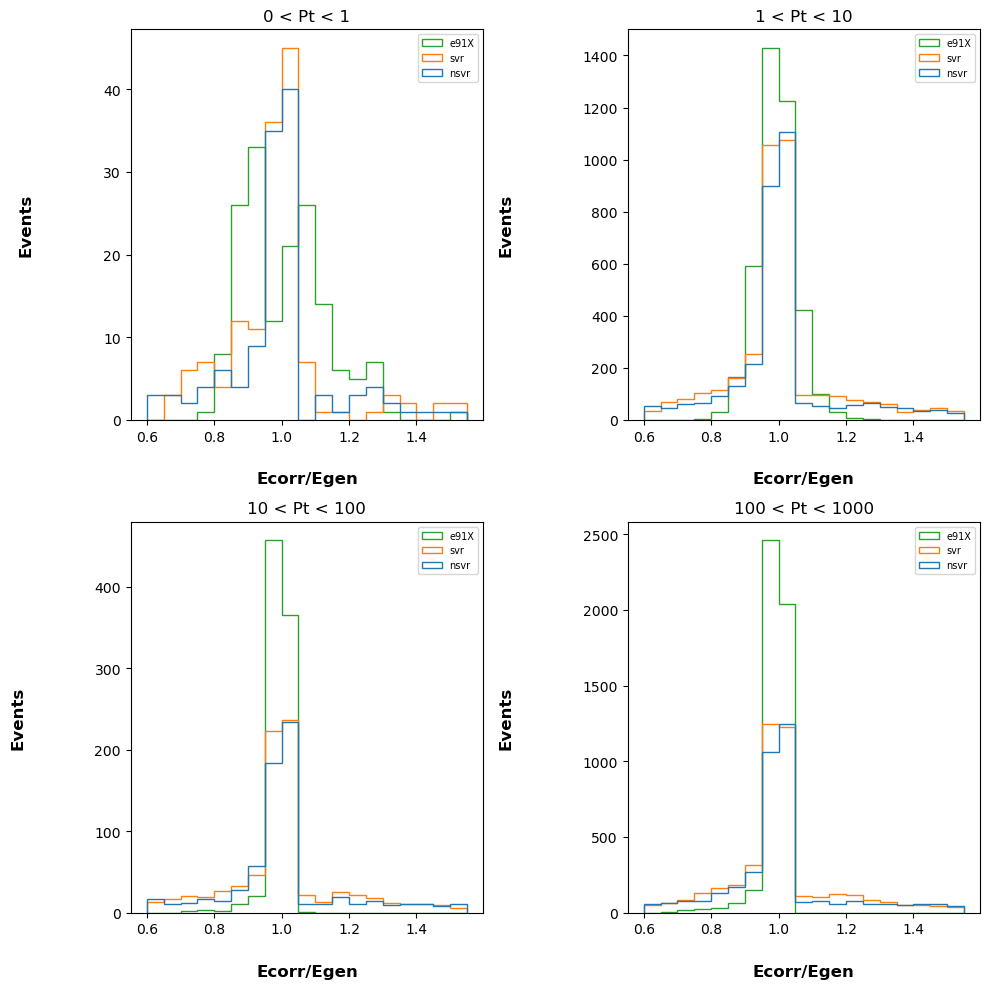

In [106]:
list_of_lists = []

fig, ax1 = plt.subplots(2,2, figsize =(10, 10),sharey=False,tight_layout=True )

for i in range(4):    
    a = i%2
    b = (i - (i%2))/2 
    a = int(a)
    b = int(b)
    
    
    
    list_of_lists.append([
        dict_of_genPt_lists_2[i]['nsvrDivGen'],
        dict_of_genPt_lists_2[i]['svrDivGen'], 
        #dict_of_genPt_lists_2[i]['xgbrDivGen'],
        #dict_of_genPt_lists_2[i]['hgbrDivGen'],
        #dict_of_genPt_lists_2[i]['adaDivGen'],
        #dict_of_genPt_lists_2[i]['knrDivGen'],
        #dict_of_genPt_lists_2[i]['rfrDivGen'],
        #dict_of_genPt_lists_2[i]['etrDivGen'],
        dict_of_genPt_lists_2[i]['e91XDivGen'],
        #dict_of_genPt_lists_2[i]['corrDivGen']
        ])
    
    
   
    labels = [
        "nsvr",
        "svr", 
        #"xgbr",
        #"hgbr", 
        #"ada", 
        #"knr", 
        #"rfr", 
        #"etr", 
        "e91X", 
        #"corr"
        ]

    count, bins, ignored = ax1[b,a].hist(list_of_lists[i], label = labels, histtype='step', bins = np.arange(.6,1.6,0.05))
    
    ax1[b,a].legend(prop={'size':7})
    
    
    ax1[b,a].set_xlabel("Ecorr/Egen", labelpad=20, weight='bold', size=12)
    ax1[b,a].set_ylabel("Events", labelpad=50, weight='bold', size=12)
    ax1[b,a].set_title((str(Ptrange_0_1_10_100_1000(i)[0]) + " < Pt < " + str(Ptrange_0_1_10_100_1000(i)[1])))
    
    
    
    bins = bins[:-1]
    
plt.savefig("reg_comp_hist.pdf")

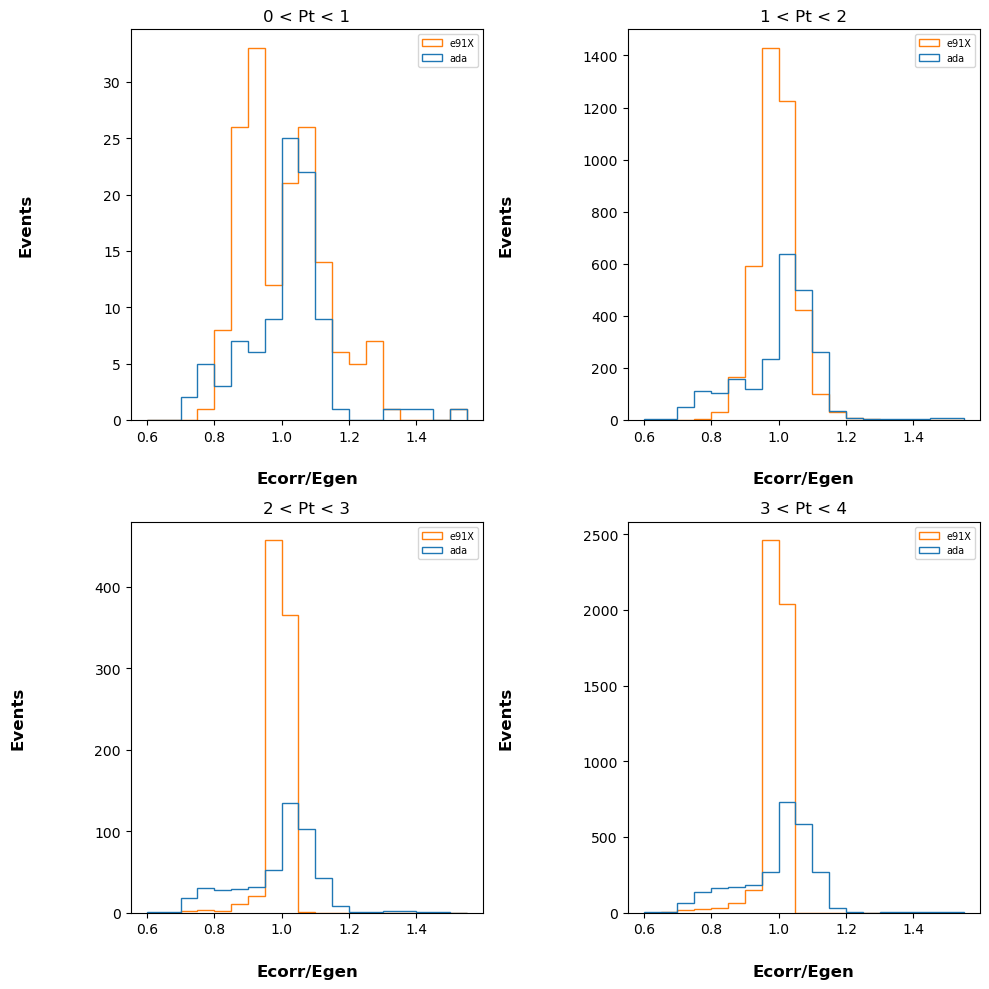

In [109]:
list_of_lists = []

fig, ax2 = plt.subplots(2,2, figsize =(10, 10),sharey=False,tight_layout=True )

for i in range(4):    
    a = i%2
    b = (i - (i%2))/2 
    a = int(a)
    b = int(b)
    
    
    
    list_of_lists.append([
        #dict_of_genPt_lists_2[i]['nsvrDivGen'],
        #dict_of_genPt_lists_2[i]['svrDivGen'], 
        #dict_of_genPt_lists_2[i]['xgbrDivGen'],
        #dict_of_genPt_lists_2[i]['hgbrDivGen'],
        dict_of_genPt_lists_2[i]['adaDivGen'],
        #dict_of_genPt_lists_2[i]['knrDivGen'],
        #dict_of_genPt_lists_2[i]['rfrDivGen'],
        #dict_of_genPt_lists_2[i]['etrDivGen'],
        dict_of_genPt_lists_2[i]['e91XDivGen'],
        #dict_of_genPt_lists_2[i]['corrDivGen']
        ])
    
    
   
    labels = [
        #"nsvr",
        #"svr", 
        #"xgbr",
        #"hgbr", 
        "ada", 
        #"knr", 
        #"rfr", 
        #"etr", 
        "e91X", 
        #"corr"
        ]

    count, bins, ignored = ax2[b,a].hist(list_of_lists[i], label = labels, histtype='step', bins = np.arange(.6,1.6,0.05))
    
    ax2[b,a].legend(prop={'size':7})
    
    
    ax2[b,a].set_xlabel("Ecorr/Egen", labelpad=20, weight='bold', size=12)
    ax2[b,a].set_ylabel("Events", labelpad=50, weight='bold', size=12)
    ax2[b,a].set_title((str(Ptrange_0_1_2_3_4_5_10_50_100_1000_10000(i)[0]) + " < Pt < " + str(Ptrange_0_1_2_3_4_5_10_50_100_1000_10000(i)[1])))
    
    df_lol = pd.DataFrame(list_of_lists)
    mun, sigma = norm.fit(list_of_lists[i][1])
    count = np.array(count)
    mean = count.mean()
    bins = bins[:-1]

    #ax2[b,a].plot(bins, mean*(sigma**.4)*3* (1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mun)**2 / (2 * sigma**2) )), linewidth=2, color='r')

    
    
plt.savefig("reg_comp_hist.pdf")

# Fitting process:

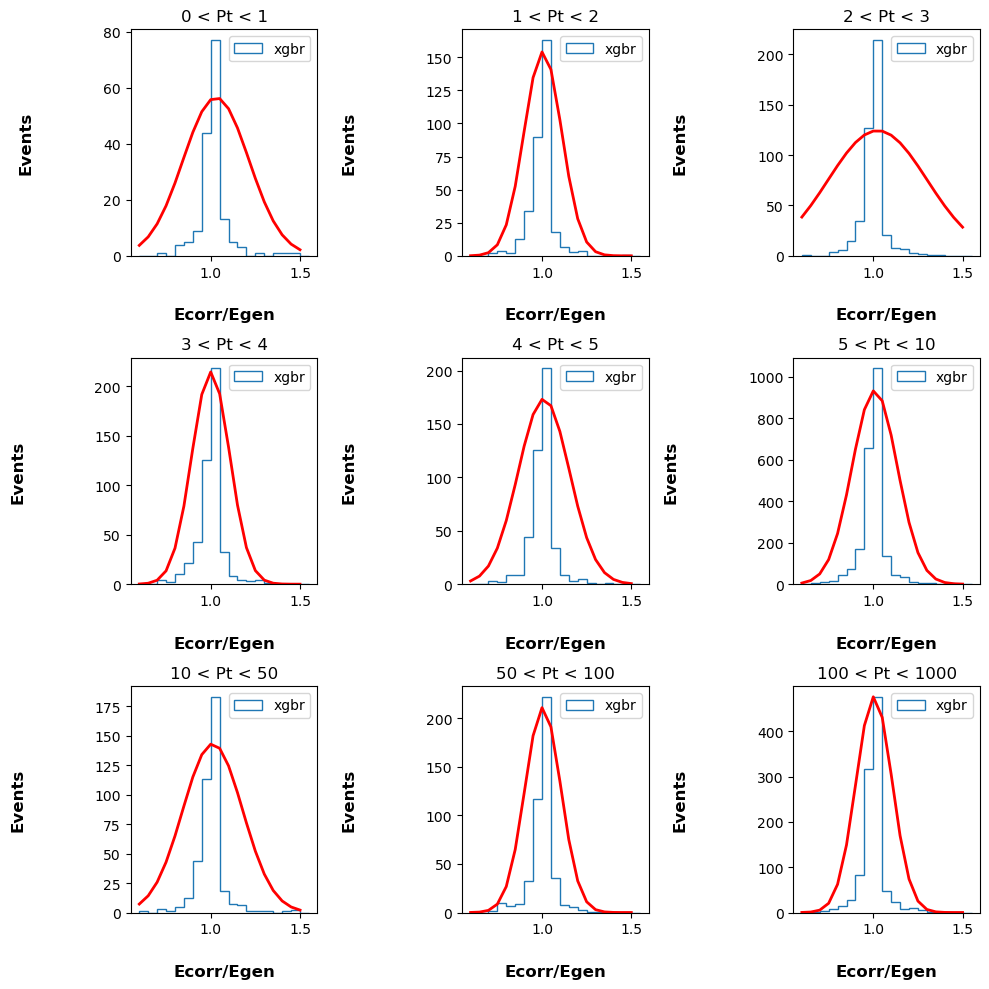

In [156]:

list_of_lists = []

fig, ax3 = plt.subplots(3,3, figsize =(10, 10),sharey=False,tight_layout=True )

for i in range(9):    
    a = i%3
    b = (i - (i%3))/3 
    a = int(a)
    b = int(b)
    
    
    
    list_of_lists.append([
        #dict_of_genPt_lists_1[i]['e91XDivGen'],
        #dict_of_genPt_lists_1[i]['nsvrDivGen'],
        #dict_of_genPt_lists_1[i]['svrDivGen'], 
        dict_of_genPt_lists_1[i]['xgbrDivGen'],
        #dict_of_genPt_lists_1[i]['hgbrDivGen'],
        #dict_of_genPt_lists_1[i]['adaDivGen'],
        #dict_of_genPt_lists_1[i]['knrDivGen'],
        #dict_of_genPt_lists_1[i]['rfrDivGen'],
        #dict_of_genPt_lists_1[i]['etrDivGen'],
        #dict_of_genPt_lists_1[i]['corrDivGen']
        ])
    
    
   
    labels = [#"e91X",
              #"nsvr",
              #"svr", 
              "xgbr",
              #"hgbr", 
              #"ada", 
              #"knr", 
              #"rfr", 
              #"etr", 
              #"corr"
             ]
    
    count, bins, ignored = ax3[b,a].hist(list_of_lists[i][0], label = labels, histtype='step', bins = np.arange(.6,1.6,0.05))
    
    ax3[b,a].legend(prop={'size':10})
    
    
    ax3[b,a].set_xlabel("Ecorr/Egen", labelpad=20, weight='bold', size=12)
    ax3[b,a].set_ylabel("Events", labelpad=50, weight='bold', size=12)
    ax3[b,a].set_title((str(Ptrange_0_1_2_3_4_5_10_50_100_1000_10000(i)[0]) + " < Pt < " + str(Ptrange_0_1_2_3_4_5_10_50_100_1000_10000(i)[1])))
    
    
    #df_lol = pd.DataFrame(list_of_lists)
    mun, sigma = norm.fit(list_of_lists[i][0])
    count = np.array(count)
    mean = count.mean()
    bins = bins[:-1]

    ax3[b,a].plot(bins, mean*(sigma**.5)*7* (1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mun)**2 / (2 * sigma**2) )), linewidth=2, color='r')

plt.savefig("reg_comp_hist.pdf")